### Project: Understanding Employee Attrition with Machine Learning 
### Activity: Decision Tree  Model Evaluation on Up Sampled Data
### Model: Decision Tree
### Author: Tawanda Nigel Chitapi
### Email: nigel.chitapi@gmail.com    
### Date: September 05, 2022
### Institution: BrainStation

In [1]:
# import packages

# the data science trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# model selection tools
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import StandardScaler

# linear models
from sklearn.tree import DecisionTreeClassifier


# metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# SMOTE
from imblearn.over_sampling import SMOTE

The goal of this deliverable is to build a model that predicts employee attrition of health  care workers at a hospital and in the end determine which of the provided variables are most associated with employee attrition and which ones encourage employees to stay on the job.

We intend to build a high performing model with regards to precision and recall. With precision measuring how accurate our model is at predicting attrition overall and recall measuring how accurate our model is at predicting attrition correctly out of all attrition prediction it makes of which may include some false positives.

The goal of this notebook is to perform upsampling on the the training data in order to solve the problem of imbalanced attrition classes. After balancing the data we will then instantiate the Decision Trees model, evaluate the model and compare the results with those of the unsampled data.

The work-flow will be similar to that of the Unsampled data notebook for ease of flowing the steps.

In [2]:
# load our data 

employee_df = pd.read_csv('data/employee_attrition.csv')

In [3]:
# sanity check to see if our data loaded successfully

employee_df.head()

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Other,Technical Degree,Admin,Administrative,Nurse,Other.1,Therapist,Divorced,Married,Single
0,1313919,41,0,1102,1,2,1,2,1,94,...,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,0,0,1,0,0,0,1,0


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeID                1676 non-null   int64
 1   Age                       1676 non-null   int64
 2   Attrition                 1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EmployeeCount             1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobLevel                  1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

In [5]:
# features
X = employee_df.drop('Attrition', axis=1)

# target
y = employee_df['Attrition']

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    stratify = y,
    random_state = 1
)

We have initiated an 70% train set and 30% test set split on our data 

Our dataset contains 50 columns, with the amount of data that we have (1676 rows), 50 columns are too wide a dimension puts our model at the risk of the curse of dimensionality. After we conducted feature engineering during data cleaning and processing, the number of features in our dataset incresed from 35 to 50.
In order to best predict our target variable we need to conduct some feature selection and select only those variables that best predict out target variable.
To achieve this we will use the Fisher - Chi-Squared test and assess the derived p-values to select on the best predictor with p-values less than the threshold of 0.05.
The Fisher - Chi-Squared test is applied on the training data because the selected features are used to train the model.

In [7]:
from sklearn.feature_selection import chi2

In [8]:
f_p_values = chi2(X, y)

f_p_values

(array([1.21143359e+03, 2.18075488e+02, 9.80042735e+02, 1.34752206e+02,
        9.14675779e-01, 0.00000000e+00, 7.62324266e+00, 4.26023102e-01,
        1.37660534e+01, 8.64185842e+00, 4.33138845e+01, 4.99790687e+00,
        2.15238646e+05, 1.25027767e+04, 1.15322155e+00, 0.00000000e+00,
        1.36592523e+02, 1.26983331e-02, 7.82147747e-03, 2.99901161e-01,
        0.00000000e+00, 3.81226029e+01, 4.97310855e+02, 2.98027378e+00,
        2.44735458e+00, 3.59223808e+02, 2.23346033e+02, 5.90028751e+01,
        2.07527896e+02, 1.08669784e+00, 1.07867314e+01, 1.71639456e+00,
        2.15864231e+00, 1.45973417e-01, 5.70868185e+00, 2.15412094e+00,
        2.11386774e-02, 1.56263236e+00, 2.29483170e+00, 6.51176112e-01,
        1.19062460e+00, 2.15572106e+00, 1.33078829e+01, 1.02725034e+00,
        9.96392145e+00, 1.71956394e+01, 1.09284509e+01, 1.20169006e+01,
        4.95438134e+01]),
 array([1.99742170e-265, 2.37780925e-049, 3.91110641e-215, 3.74056454e-031,
        3.38876833e-001, 1.0000000

The variable **f_p_values** refers to f-score, p-value values, the first array [0] represents f-scores and the second array [1] represent the p-values.

In [9]:
# create a series of p_values and match them to the relevant columns 

p_values = pd.Series(f_p_values[1],index = X.columns)

In [10]:
# sort the p_values in descending order 
p_values.sort_values(ascending = False , inplace = True)

Plot a bar graph of the column and relevant p_values to better identify and select preferred columns

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

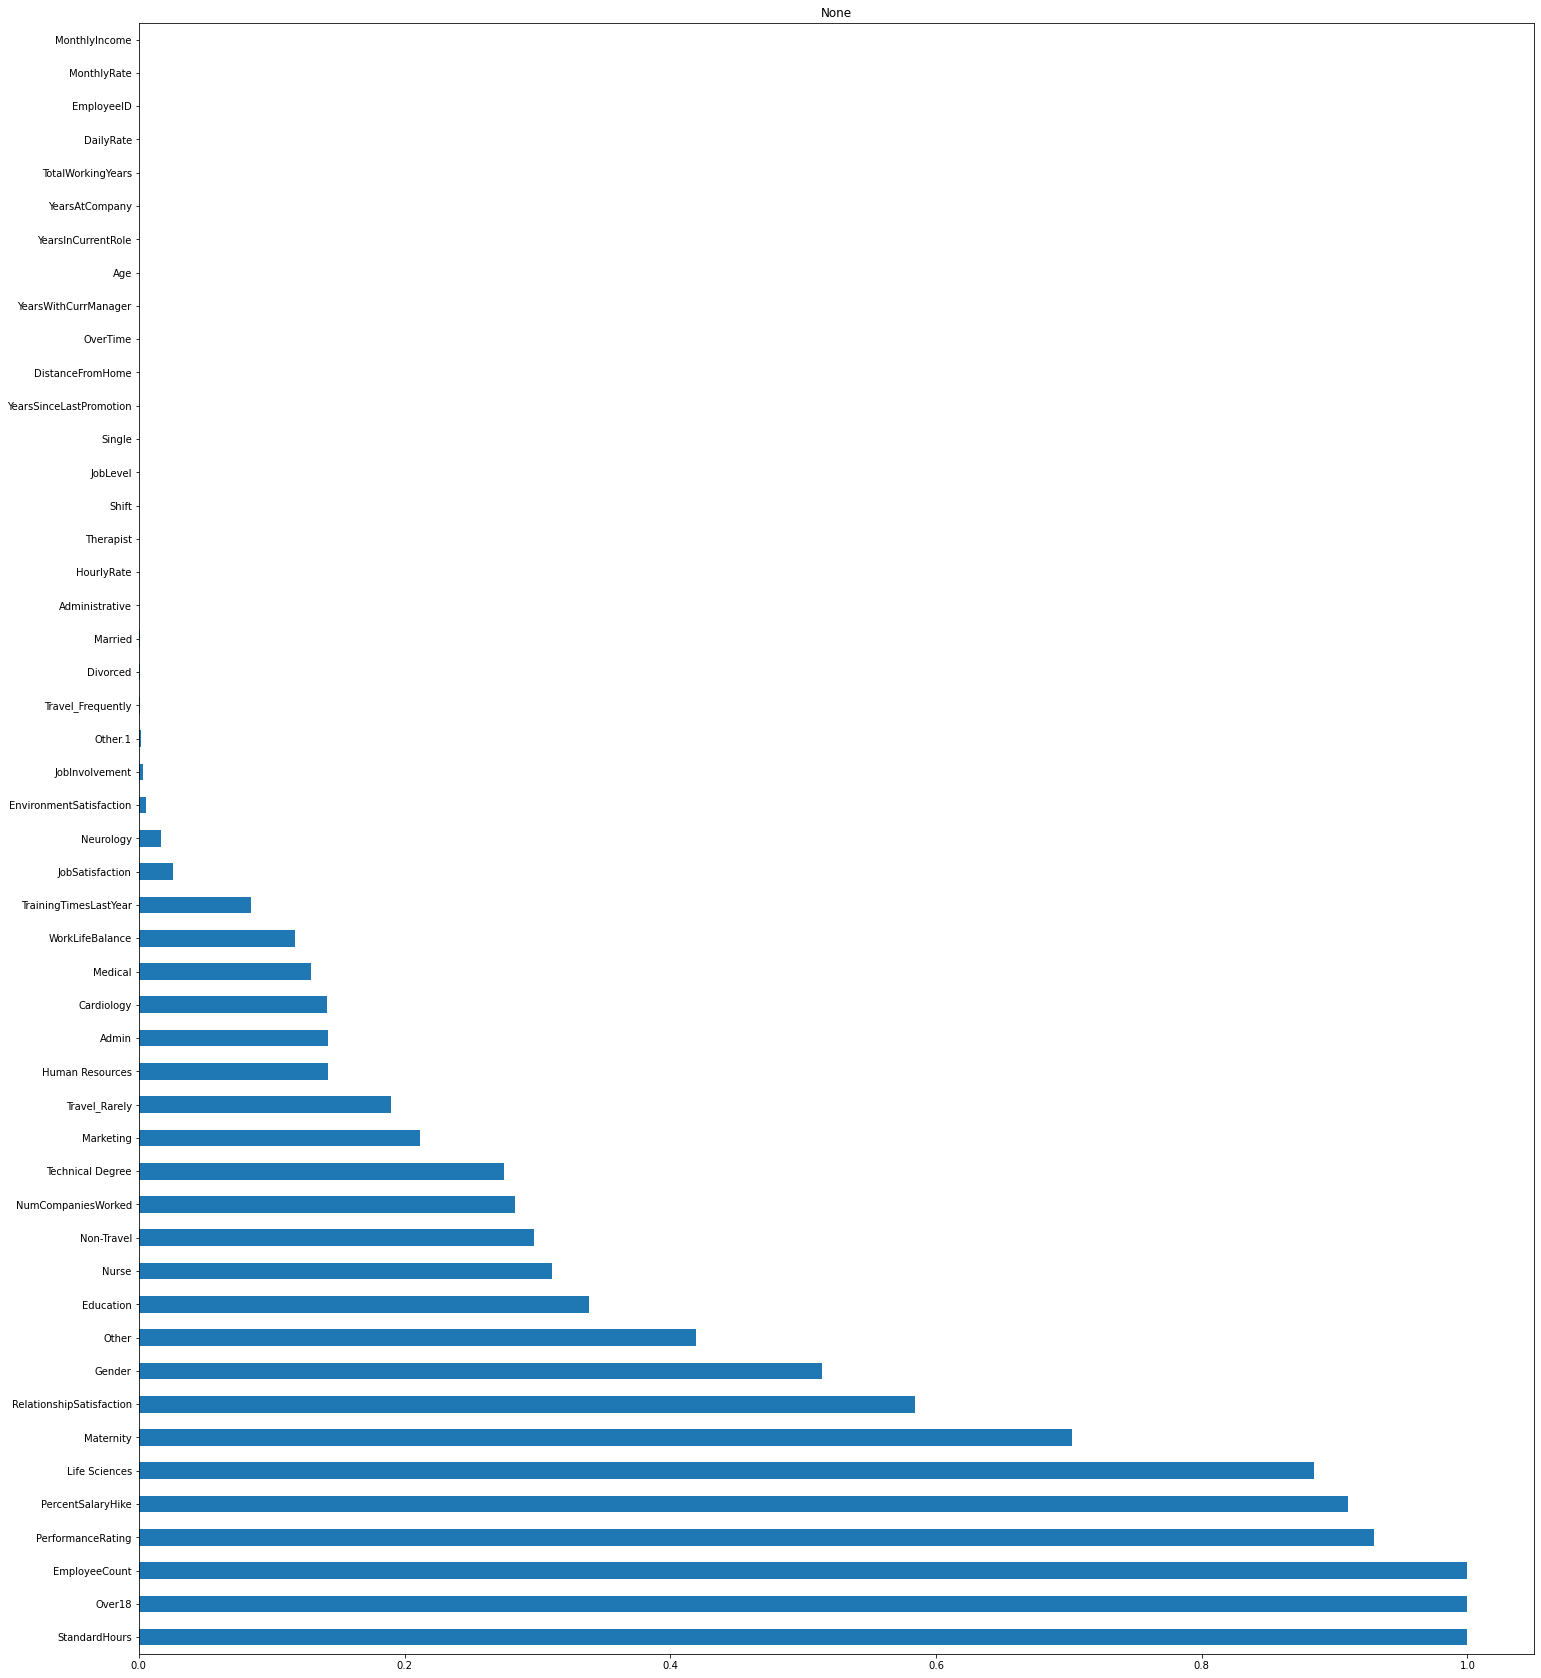

In [11]:
#Plot a bar graph
p_values.plot.barh(figsize= (25,30), subplots=True) 

In [12]:
# Newly Updated features
X = employee_df[['Age','DailyRate', 'DistanceFromHome', 'JobLevel','OverTime','Single',
               'Shift','TotalWorkingYears','Therapist', 'MonthlyRate', 'HourlyRate',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                 'YearsWithCurrManager','Travel_Frequently','Married', 'Divorced',
                 'Administrative']]

# target
y = employee_df['Attrition']

After observing the results from the plot above, we have selected features with p_value less than 0.05 as these will best predict our target variable. 

#### We will upsample our data using the SMOTE, an algorithm that performs data augmentation by creating synthetic data points based on the original data points. This will be instatiated and fit on the training data

In [13]:
# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [14]:
# check what SMOTE has done

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    1034
1     139
Name: Attrition, dtype: int64


Resampled class distribution


0    1034
1    1034
Name: Attrition, dtype: int64

When building a Decision Tree model we do not need to scale the data, the decision Trees model is not affected by unscaled data

In [15]:
# fitting the DT
DT_employee_model = DecisionTreeClassifier(random_state=1)

#Fit
DT_employee_model.fit(X_train_sm, y_train_sm)

# Getting the score
print(DT_employee_model.score(X_train_sm, y_train_sm))
print(DT_employee_model.score(X_test, y_test))

1.0
0.8409542743538767


The model test accuracy score is 84%, this may be considered good but we need to further granulate the performance matrics of the model and assess how accurate is is at predicting true positive and true negatives.

### Evaluation on Test Data

In [16]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [17]:
# predict classification
y_test_pred = DT_employee_model.predict(X_test)

In [18]:
# Generate the (raw) confusion matrix:

cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[394,  49],
       [ 31,  29]])

In [19]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,394,49
true 1,31,29


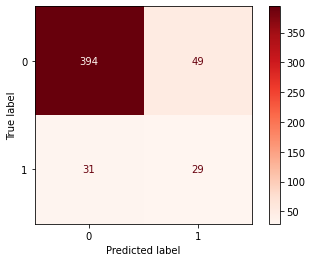

In [20]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_employee_model, X_test, y_test, cmap='Reds');

The model predicted 394 True Negatives, 29 True Positives, 31 False Positive and 49 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [21]:
# Classification report
from sklearn.metrics import classification_report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       443
           1       0.37      0.48      0.42        60

    accuracy                           0.84       503
   macro avg       0.65      0.69      0.66       503
weighted avg       0.86      0.84      0.85       503



From the classification report we observed that the precision rate of the model at predicting attrition is 37% and the recall rate is 48% and f1-score is 42%.

This model's performance is poor across the board since the scores are all below 50%.


We will attempt to optimize hyperpameters, specifically the depth of the trees and assess if that will improve our model performance

### Hyperparameter Optimization

We'll take our train data and split it to create a validation dataset from it. 
* Train + Validation Sets: 80%
* Test Set: 20%

Let's separate our our test set. Since our test data has been seperated already we will go ahead and split the train dataset and create a validation dataset

Now, `X_remainder` and `y_remainder` contain the other 80%. Of remaining data, we take a 70% training set and 30% validation set.

In [43]:
# Splitting the remainder in two chunks
X_train_new, X_validation, y_train_new, y_validation = \
    train_test_split(X_train_sm, y_train_sm, test_size = 0.3,
                     random_state=1)

In [44]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train_new.shape}')

Shape of test set: (503, 49)
Shape of validation set: (621, 49)
Shape of train set: (1447, 49)


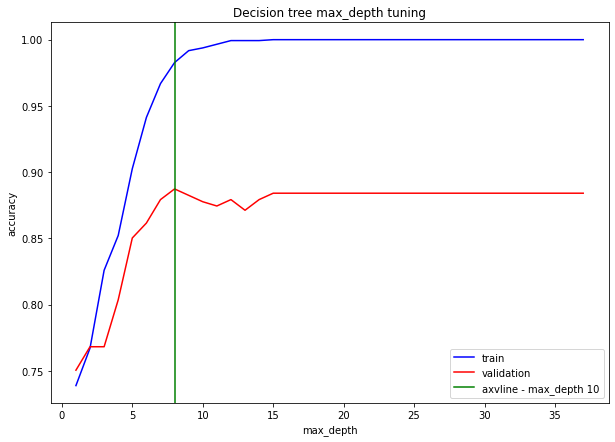

In [47]:
depths = list(range(1, int(np.sqrt(len(X_train_new)))))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    dt.fit(X_train_new, y_train_new)
    
    # Evaluate
    train_scores.append(dt.score(X_train_new, y_train_new))
    validation_scores.append(dt.score(X_validation, y_validation))
    
plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.axvline(x = 8, color = 'green', label = 'axvline - max_depth 10')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")
plt.legend()
plt.show()

In [48]:
# fitting the DT
DT_employee_optimized_model = DecisionTreeClassifier(max_depth = 8, random_state=1)

#Fit
DT_employee_optimized_model.fit(X_train_new, y_train_new)

# Getting the score
print(DT_employee_optimized_model.score(X_train_new, y_train_new))
print(DT_employee_optimized_model.score(X_validation, y_validation))

0.9827228749136143
0.8872785829307569


The validation score is 89% which is 5 percentage points above the test score from the previous model, we will now assess the model on the test data.

### Evaluation on Test Data - After optimizing hyperparameter (c-value)

In [49]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [50]:
# predict classification
y_test_pred = DT_employee_optimized_model.predict(X_test)

Generate the (raw) confusion matrix:

In [51]:
cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[390,  53],
       [ 25,  35]])

In [52]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,390,53
true 1,25,35


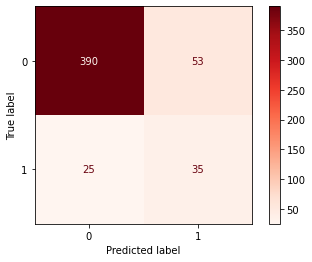

In [53]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_employee_optimized_model, X_test, y_test, cmap='Reds');

The model predicted 390 True Negatives, 35 True Positives, 25 False Positive and 53 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [54]:
# Classification report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       443
           1       0.40      0.58      0.47        60

    accuracy                           0.84       503
   macro avg       0.67      0.73      0.69       503
weighted avg       0.88      0.84      0.86       503



From the classification report we observed that the precision rate of the model has improved from 37% to 40% and the recall rate improved significantly from 48% to 58% and f1-score improved from 42% to 47%. 

With our goal of predicting attrition, we need to detect as much attrition as possible and so the improvement in the recall score is a good improvement for the model. We will attempt to further optimize the hyperparameters using the pipeline GridSearch and assess if our model performs better

### Now we wil employ a pipeline GridSearch to determine the best estimators and prevailing parameters. 

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [56]:
# estimators
# note that all the planned steps must be included, but the second elements in each tuple are more like placeholders
estimators = [

    ('model', DecisionTreeClassifier())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
        
    # decision tree classifier
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': range(2, 21),
        'model__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
        'model__random_state': [1]
    }
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 152 candidates, totalling 760 fits


After fitting the grid to the training data, use the `best_estimator_` attribute on your grid search object to obtain the most optimal model and its parameters. 

In [57]:
# check the most optimal model
grid.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=1))])

### Now using our best estimator we will re-run our model with the specified parameters and evaluate the model

In [58]:
# fitting the DT
DT_employee_final_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=1)

#Fit
DT_employee_final_model.fit(X_train_sm, y_train_sm)

# Getting the score
print(DT_employee_final_model.score(X_train_sm, y_train_sm))
print(DT_employee_final_model.score(X_test, y_test))

0.9796905222437138
0.8508946322067594


The test accuracy score has improved from 84% to 85% with the GridSearch optimization

### Evaluation on Test Data - After determing the best estimators and fitting the parameters in the Logistic Regression Model 

In [59]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [60]:
# predict classification
y_test_pred = DT_employee_final_model.predict(X_test)

Generate the (raw) confusion matrix:

In [61]:
cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[400,  43],
       [ 32,  28]])

In [62]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,400,43
true 1,32,28


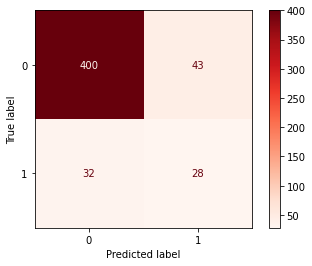

In [63]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_employee_final_model, X_test, y_test, cmap='Reds');

The model predicted 400 True Negatives, 32 True Positives, 32 False Positive and 43 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [64]:
# Classification report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       443
           1       0.39      0.47      0.43        60

    accuracy                           0.85       503
   macro avg       0.66      0.68      0.67       503
weighted avg       0.86      0.85      0.86       503

[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2, model__random_state=1;, score=0.746 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=5, model__random_state=1;, score=0.746 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=6, model__random_state=1;, score=0.746 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=8, model__random_state=1;, score=0.778 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_l

From the classification report we observed that the precision rate of the model has decreased from 40% to 39% and the recall rate dropped significantly from 58%% to 47% and f1-score dropped from 47% to 43%.

The Pipeline GridSearch did not yield a better performing model, compared to the manually optimized model.

### Conclusion

The best Decision Tree resulted in a precision score of 40%, a recall score of 58%, f1-score of 47% and an accuracy of 84%.

Although the recall rate is fairly good, the f1-score, the harmonic mean of the precision and recall and is still significantly low at 47% meaning that the model will yield more unwanted false positives and false negatives

Comparing this Decision Tree to the Logistic Regression model, the preferred model that we will employ to predict "Employee Attrition" will be the Logistic Regression model. The logistic Regression model we manually optimized hyperparameters on yielded a precision score of 81%, a recall rate of 57%, an f1-score of 67% and an accuracy of 93%

The model with the higher f1-score in comparison is the most preferred as it produced less false positives and false negatives. And for this project the Logistic Regression model stands on top.


